<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/emoji-mapping-exercise-zoe-ry/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:**Zoé REY

**Student Number:**400677239

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

In [35]:
import pandas as pd

df = pd.read_csv('/content/W33836-XLS-ENG.csv', delimiter=';')

display(df.head())

print("Size of the dataset (row, col): ",df.shape)
#There are 29 columns and 2240 rows in the dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09/04/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,03/08/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,02/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Size of the dataset (row, col):  (2240, 29)


## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [36]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

#My strategy is to drop them because the dataset is large and missing values are
#few in comparison
df.dropna(inplace=True)
df

Missing values per column:
Income    24
dtype: int64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09/04/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,03/08/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,02/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,06/10/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [37]:
constant_columns = df.columns[df.nunique() == 1]

print(f"Columns with constant values: {list(constant_columns)}")

# Drop constant columns from my DataFrame
df = df.drop(columns=constant_columns)

print(f"Number of columns remaining: {df.shape[1]}")

Columns with constant values: ['Z_CostContact', 'Z_Revenue']
Number of columns remaining: 27


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [38]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%Y-%m-%d', errors='coerce')
today = datetime.today()
df["Customer_Days"] = (today - df["Dt_Customer"]).dt.days

display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,NaT,58,635,...,4,7,0,0,0,0,0,0,1,NaN
1,2174,1954,Graduation,Single,46344.0,1,1,NaT,38,11,...,2,5,0,0,0,0,0,0,0,NaN
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,10,4,0,0,0,0,0,0,0,NaN
3,6182,1984,Graduation,Together,26646.0,1,0,NaT,26,11,...,4,6,0,0,0,0,0,0,0,NaN
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,6,5,0,0,0,0,0,0,0,NaN


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

Education Category Counts:
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


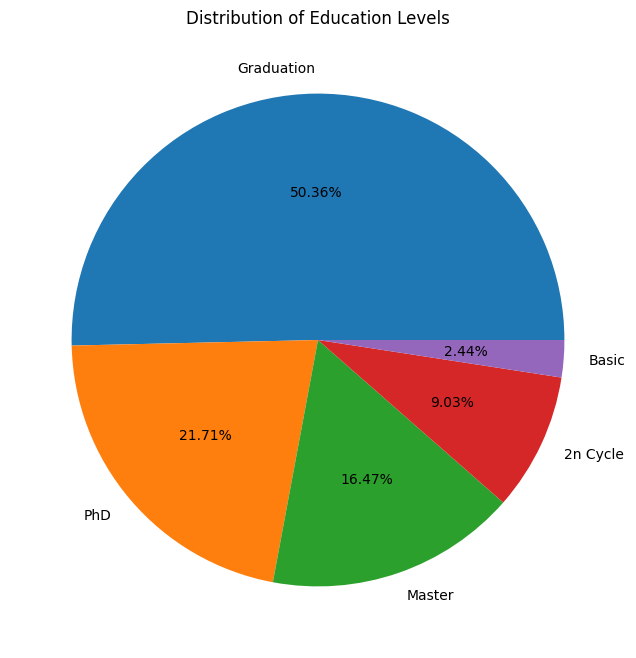


Marital Status Category Counts:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


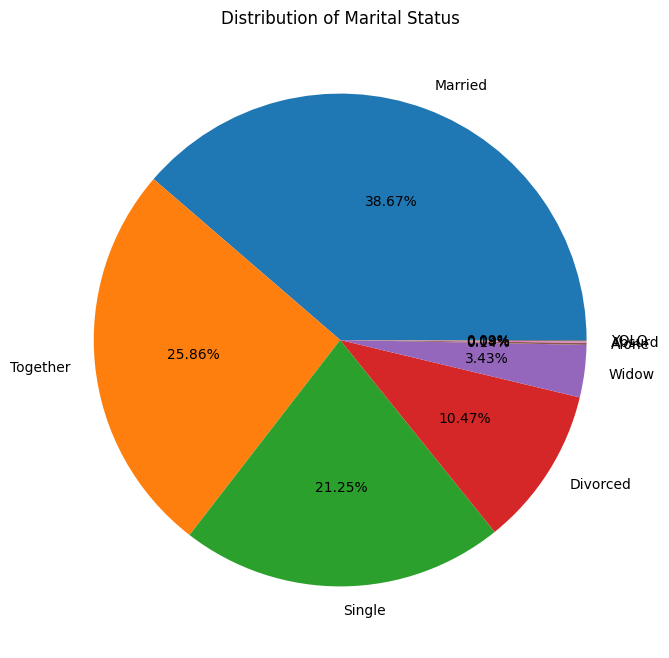

In [39]:
# Education
education_counts = df['Education'].value_counts()
print("Education Category Counts:")
print(education_counts)

plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%')
plt.title('Distribution of Education Levels')
plt.show()

# Marital_Status
marital_status_counts = df['Marital_Status'].value_counts()
print("\nMarital Status Category Counts:")
print(marital_status_counts)

plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.2f%%')
plt.title('Distribution of Marital Status')
plt.show()

#This data suggests that Nata Supermarkets’ customer base is predominantly educated
#since over 88% of customers hold a college degree or higher. This could mean that customers are
#professionally employed and likely have a higher disposable income.

#It also highlights that nearly 65% (Married + Together) of customers are in relationships
#and only 21% are single (minority).

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

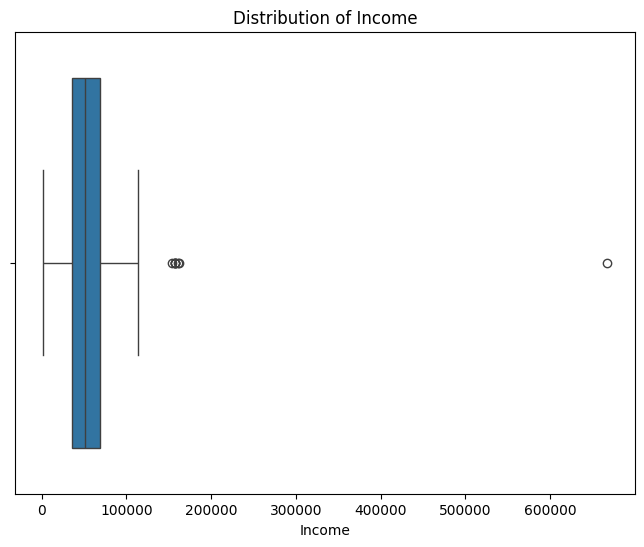

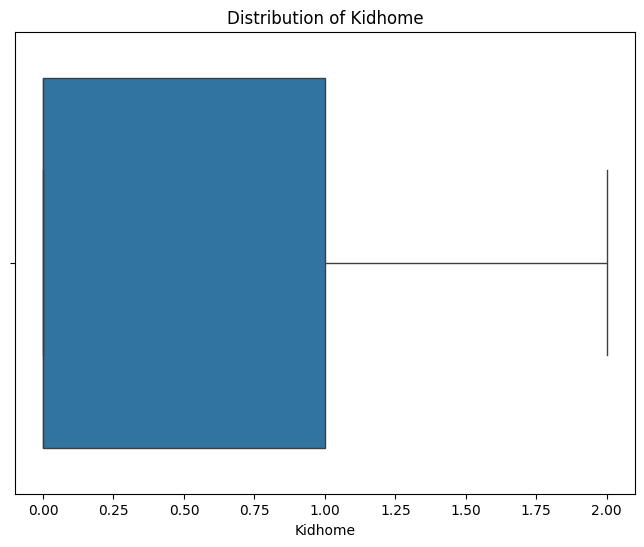

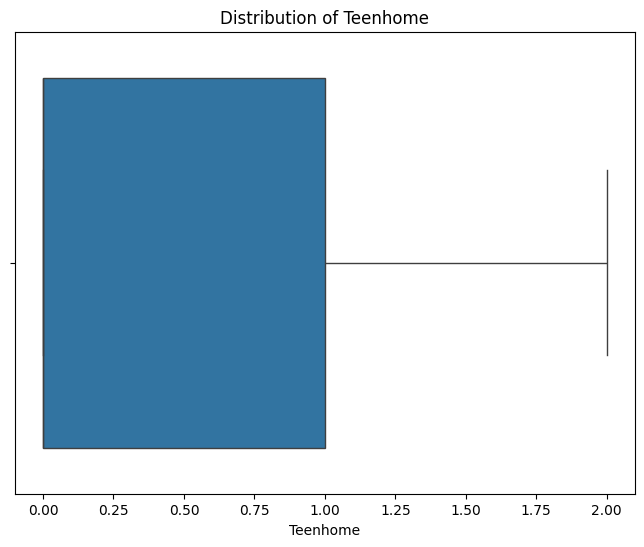

In [40]:
# Income
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Distribution of Income')
plt.show()

# Kidhome
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Kidhome'])
plt.title('Distribution of Kidhome')
plt.show()

# Teenhome
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Teenhome'])
plt.title('Distribution of Teenhome')
plt.show()


#According to these boxplot, we can say that the typical household profile of Nata's
#customers are moderate to upper-middle-income household with few or no children.

#Indeed, the income distribution is concentrated around the lower-to-middle range,
#with a few high-income outliers that highlights a small portion of wealthier
#customers representing a premium-spending segment.

#Moreover, both the Kidhome and Teenhome boxplots both show that most households
#have either no children or just one indicating smaller family sizes.

#To conclude, we could say that Nata’s customer base largely consists of working
#professionals or couples often without children.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [41]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

total_spending = df[spending_columns].sum()

print("Total spending per product category:")
print(total_spending)

#The most popular product is MnTWines with a total spending amount by all customers
#of 676083

Total spending per product category:
MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used Gen. AI tools to double check my code. Especially when there was an error, I used Gemini to help me understand where was my error coming from in my code.